In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
#import os; os.environ['KERAS_BACKEND'] = 'theano'
import tensorflow as tf
import numpy as np
import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True'
import pandas as pd
import PIL
from PIL import Image as im
print(tf.__version__)
#import tensorflow_addons as tfa
#print(tfa.__version__)
import pickle
import random

from matplotlib import image
import cv2
from tensorflow.keras.optimizers import Adam

from tensorflow import keras
from tensorflow.keras import layers
#tf.compat.v1.disable_eager_execution()
print(tf.executing_eagerly())

2.5.0
True


In [ ]:
!pip install tensorflow-addons

In [2]:
try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.TPUStrategy(tpu)

Running on TPU  ['10.108.238.114:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.108.238.114:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.108.238.114:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [3]:
from google.colab import drive
#drive.flush_and_unmount()
drive.mount('/content/gdrive')
!ls "gdrive/My Drive/"

Mounted at /content/gdrive
'Colab Notebooks'	  LifeCLEF2015Plant   tf_issue
 ImageCLEF2013PlantTask   models	      tutorial


In [4]:
#!gcloud auth activate-service-account --help
!gcloud init
#!gcloud auth login

Welcome! This command will take you through the configuration of gcloud.

Settings from your current configuration [default] are:
component_manager:
  disable_update_check: 'True'
compute:
  gce_metadata_read_timeout_sec: '0'

Pick configuration to use:
 [1] Re-initialize this configuration [default] with new settings 
 [2] Create a new configuration
Please enter your numeric choice:  1

Your current configuration has been set to: [default]

You can skip diagnostics next time by using the following flag:
  gcloud init --skip-diagnostics

Network diagnostic detects and fixes local network connection issues.
Reachability Check passed.
Network diagnostic passed (1/1 checks passed).

You must log in to continue. Would you like to log in (Y/n)?  y

Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapi

In [ ]:
#!gsutil cp -r 'gdrive/MyDrive/LifeCLEF2015Plant' gs://clef_2015_tfrecords 

In [ ]:
!rm -rf '/cache/'

In [ ]:
os.mkdir('/cache/')

In [ ]:
!rm -rf '/LifeCLEF2015Plant/'

In [5]:
DRIVE_DIR = 'gdrive/MyDrive/'
DATA_DIR = 'LifeCLEF2015Plant'

LIST_OF_TRAINING_IMAGES = '/list_of_train_images.csv'
PATH_LIST = DATA_DIR +'/resources/' + 'training_path_list.csv'

In [ ]:
def get_filenames(base_dir):
  filenames = list()
  for file in os.listdir(base_dir):
    if file.endswith('.tfrecord'):
      filenames.append(base_dir+file)
  return filenames

In [6]:
!gcloud auth application-default login

Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=764086051850-6qr4p6gpi6hn506pt8ejuq83di341hur.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth&state=aeOnsUCk7aY9hymt9bAQPRGbqaSzXI&prompt=consent&access_type=offline&code_challenge=tz8DWjPizxQMmCocR8iCTqQLikRSkvfp7HaS0oUnxGU&code_challenge_method=S256

Enter verification code: 4/1AX4XfWhY-y2SLcyi4DETsLLooBTzi4GfPfe9-KnedKYpvzqQ8poA503Jr6Q

Credentials saved to file: [/content/.config/application_default_credentials.json]

These credentials will be used by any library that requests Application Default Credentials (ADC).

Quota project "plucky-cargo-245915" was added to ADC which can be used by Google client libraries for billing and quota. Note that some service

In [7]:
def get_filenamesTPU(base_dir):
  filenames = tf.io.gfile.glob(base_dir+'*.tfrecord')
  return filenames

In [8]:
def train_model(train_path, validation_path, buffer_size, epochs, steps_per_epoch, model):
  data_augmentation = preprocessing_model()

  train_filenames = get_filenamesTPU(train_path)
  random.shuffle(train_filenames)

  validation_filenames = get_filenamesTPU(validation_path)
  random.shuffle(validation_filenames)

  dataset_length = 91758  
  train_size =  dataset_length * 0.7
  validation_size = dataset_length - train_size

  buffer_size = buffer_size * tpu_strategy.num_replicas_in_sync
  
  batch_size = 32 * tpu_strategy.num_replicas_in_sync

  tpu_arg_0 = 32 * batch_size

  data_reshape = lambda x,y: (tf.reshape(x,shape=(tpu_arg_0,224,224,3)), (tf.reshape(y[0],shape=(tpu_arg_0,516)),tf.reshape(y[1],shape=(tpu_arg_0,124))))
  
  augmentation_pipeline = lambda x,y: (data_augmentation(tf.expand_dims(x,axis=0)),(tf.tile(tf.reshape(y[0],[1,516]),[32,1]),tf.tile(tf.reshape(y[1],[1,124]),[32,1])))
  
  AUTO = tf.data.AUTOTUNE
  train_dataset = tf.data.TFRecordDataset(buffer_size=int(2e+8)* tpu_strategy.num_replicas_in_sync,num_parallel_reads=AUTO,filenames=train_filenames).map(parsing_fn,num_parallel_calls=AUTO).shuffle(buffer_size=buffer_size, reshuffle_each_iteration=True)
  train_dataset = train_dataset.map(augmentation_pipeline, num_parallel_calls=AUTO).batch(batch_size=batch_size, drop_remainder=True)
  train_dataset = train_dataset.map(data_reshape,num_parallel_calls=AUTO)#.cache('/cache/train_cache')
  train_dataset = train_dataset.repeat()
  train_dataset = train_dataset.prefetch(AUTO)
 
  # Create a validation dataset
  validation_dataset = tf.data.TFRecordDataset(num_parallel_reads=AUTO,filenames=validation_filenames).map(parsing_fn,num_parallel_calls=AUTO)
  validation_dataset = validation_dataset.batch(batch_size)
  validation_dataset = validation_dataset.prefetch(AUTO)
  validation_dataset = validation_dataset.repeat(1)

  validation_steps = validation_size / batch_size # "This ensures that the same validation samples are used every time"
  history = model.fit(x=train_dataset,
                          epochs=epochs,
                          steps_per_epoch=steps_per_epoch,                        
                          validation_data=validation_dataset,
                          validation_steps=validation_steps)
  return history

In [ ]:
8770 % (32*32)

578

In [ ]:
(91758 * 0.7) / (32  * 8)

250.90078125

In [ ]:
base_directory = 'gs://clef_tfrecords'

train_path = base_directory+'/LifeCLEF2015Plant/tfrecords/train/train/'
validation_path = base_directory+'/LifeCLEF2015Plant/tfrecords/train/validation/'

get_filenamesTPU(train_path)

In [ ]:
#!gcloud alpha services identity create --service=tpu.googleapis.com --project=plucky-cargo-245915

Service identity created: service-437760119491@cloud-tpu.iam.gserviceaccount.com


In [9]:
def load_and_configure_model(optimizer, loss, metrics, path):
  model = ResNet50V2(include_top=True, weights='imagenet')
  transfer_layer = model.get_layer('avg_pool')

  resnet_submodel = Model(inputs=model.input,outputs=transfer_layer.output)
  model_config = resnet_submodel.get_config()
  submodel = model_config['layers']
  submodel.remove(submodel[0]) # Remove the previous input layer
  input = keras.Input(shape=(224, 224, 3), name="input")
  rescaling = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(input)
  new_model = Model(inputs=input,outputs=rescaling)
  new_model_cfg = new_model.get_config()
  new_model_cfg['layers'].extend(submodel)

  # Replace the previous input layer with the output from the preprocessing model
  # (Connect the preprocessing model to the resnet) 
  output_name = new_model_cfg['layers'][1]['name'] 
  new_model_cfg['layers'][2]['inbound_nodes'] = [[[output_name, 0, 0, {}]]]
  new_model = new_model.__class__.from_config(new_model_cfg, custom_objects={})  # change custom objects if necessary

  # Set back pre-trained weights on new model
  weights = [layer.get_weights() for layer in resnet_submodel.layers[1:]]
  for layer, weight in zip(new_model.layers[2:], weights):
      layer.set_weights(weight)

  for layer in new_model.layers[2:]:
    layer.trainable = False
  for layer in new_model.layers[2:]:
    trainable = ('conv5_block3' in layer.name or 'conv5_block2' in layer.name or 'conv5_block1' in layer.name or 'conv4_block6' in layer.name or 'conv4_block5' in layer.name)      
    layer.trainable = trainable

  transfer_layer = new_model.get_layer('avg_pool')
  genus = Dense(516, activation='softmax',name='genus')(transfer_layer.output)
  family = Dense(124,activation='softmax', name='family')(transfer_layer.output)

  model = keras.Model(
      inputs=[new_model.inputs],
      outputs=[genus,family],
  )
  if not path == None :
    model.load_weights(path)
  model.compile(optimizer=optimizer, loss=loss, metrics=metrics)      
  print_layer_trainable(model)
  return model

In [10]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

def save_history(path):
  with open(path, 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

def print_layer_trainable(conv_model):
    for layer in conv_model.layers:
        print("{0}:\t{1}".format(layer.trainable, layer.name))

def parsing_fn(serialized):
    features = \
        {
            'image': tf.io.FixedLenFeature([], tf.string),
            'species': tf.io.FixedLenFeature([1000], tf.int64),
            'genus': tf.io.FixedLenFeature([516], tf.int64),
            'family': tf.io.FixedLenFeature([124], tf.int64),           
        }
    parsed_example = tf.io.parse_single_example(serialized=serialized,
                                             features=features)
    image_raw = parsed_example['image']
    # Decode the raw bytes so it becomes a tensor with type.
    image = tf.io.decode_jpeg(image_raw)    
    # The type is now uint8 but we need it to be float.
    image = tf.cast(image, tf.float32)
    genus = tf.cast(parsed_example['genus'],tf.int32)
    family = tf.cast(parsed_example['family'],tf.int32)
    return image, (genus,family)

def plot_training_history2(history):
    acc = history.history['categorical_accuracy']
    loss = history.history['loss']

    val_acc = history.history['val_categorical_accuracy']
    val_loss = history.history['val_loss']

    plt.plot(acc, linestyle='-', color='b', label='Training Acc.')
    plt.plot(val_acc, linestyle='--', color='r', label='Test Acc.')
    plt.title('Training and Test Accuracy')
    plt.legend()
    plt.show()

    plt.plot(loss, 'o', color='b', label='Training Loss')    
    plt.plot(val_loss, 'o', color='r', label='Test Loss')
    plt.title('Training and Test Loss')
    plt.legend()
    plt.show()    

def plot_training_history3(history):
  genus_acc = history.history['genus_categorical_accuracy']
  genus_loss = history.history['genus_loss']
  genus_val_acc = history.history['val_genus_categorical_accuracy']
  genus_val_loss = history.history['val_genus_loss']
  
  plt.plot(genus_acc, linestyle='-', color='lime', label='Training Acc.')
  plt.plot(genus_val_acc, linestyle='--', color='tomato', label='Val. Acc.')
  plt.title('Genus: Training and Validation Accuracy')
  plt.legend()
  plt.show()

  plt.plot(genus_loss, 'o', color='lime', label='Training Loss')    
  plt.plot(genus_val_loss, 'o', color='tomato', label='Validation Loss')
  plt.title('Genus: Training and Validation Loss')
  plt.legend()
  plt.show()    

  family_acc = history.history['family_categorical_accuracy']
  family_loss = history.history['family_loss']
  family_val_acc = history.history['val_family_categorical_accuracy']
  family_val_loss = history.history['val_family_loss']
  
  plt.plot(family_acc, linestyle='-', color='lightskyblue', label='Training Acc.')
  plt.plot(family_val_acc, linestyle='--', color='crimson', label='Val. Acc.')
  plt.title('Family: Training and Validation Accuracy')
  plt.legend()
  plt.show()

  plt.plot(family_loss, 'o', color='lightskyblue', label='Training Loss')    
  plt.plot(family_val_loss, 'o', color='crimson', label='Validation Loss')
  plt.title('Family: Training and Validation Loss')
  plt.legend()
  plt.show()    


In [11]:
def preprocessing_model():
  input = keras.Input(shape=(224, 224, 3), name="input")
  central_crop = tf.keras.layers.experimental.preprocessing.CenterCrop(height=112,width=112)(input) 
  resized_single_crop = tf.keras.layers.experimental.preprocessing.Resizing(224,224)(central_crop)

  random_crop = keras.Sequential([tf.keras.layers.experimental.preprocessing.RandomCrop(height=56,width=74)])

  random_crop0 = random_crop(input,training=True)
  random_crop1 = random_crop(input,training=True)
  random_crop2 = random_crop(input,training=True)
  random_crop3 = random_crop(input,training=True)
  random_crop4 = random_crop(input,training=True) 

  crops = tf.keras.layers.concatenate([random_crop0,random_crop1,random_crop2,random_crop3,random_crop4],axis=0)
  resized_crops = tf.keras.layers.experimental.preprocessing.Resizing(224,224)(crops)

  rotate_1 = keras.Sequential([tf.keras.layers.experimental.preprocessing.RandomRotation(factor=[-0.125,0.125])])

  rotated_a = rotate_1(input,training=True)

  augmented_images = tf.keras.layers.concatenate([input,resized_crops,resized_single_crop,rotated_a],axis=0)

  translate_1 = keras.Sequential([keras.layers.experimental.preprocessing.RandomTranslation(height_factor=(-0.25,0.25),width_factor=(-0.25,0.25))])

  translated_a = translate_1(augmented_images,training=True)

  augmented_images = tf.keras.layers.concatenate([augmented_images,translated_a],axis=0)
  mirrored_versions = keras.Sequential([tf.keras.layers.experimental.preprocessing.RandomFlip('vertical')])
  mirrored_images = mirrored_versions(augmented_images,training=True)
  augmented_images = tf.keras.layers.concatenate([augmented_images,mirrored_images],axis=0)

  model = tf.keras.Model(inputs=input,outputs=augmented_images)
  return model

In [12]:
loss={
        "genus": 'CategoricalCrossentropy',
        "family": 'CategoricalCrossentropy',
},

metrics = ['categorical_accuracy']

optimizer = Adam(learning_rate=5e-5)

weight_file = None 
with tpu_strategy.scope():
  resnet_50V2 = load_and_configure_model(optimizer, loss, metrics, weight_file)
base_directory = 'gs://clef_tfrecords'

train_path = base_directory+'/LifeCLEF2015Plant/tfrecords/train/train/'
validation_path = base_directory+'/LifeCLEF2015Plant/tfrecords/train/validation/'

buffer_size = 10240
epochs = 20
steps_per_epoch = 252

resnet_50V2.summary()
history = train_model(train_path, validation_path, buffer_size, epochs, steps_per_epoch, resnet_50V2)

102875136/102869336 [==============================] - 2s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


True:	input
True:	rescaling
False:	conv1_pad
False:	conv1_conv
False:	pool1_pad
False:	pool1_pool
False:	conv2_block1_preact_bn
False:	conv2_block1_preact_relu
False:	conv2_block1_1_conv
False:	conv2_block1_1_bn
False:	conv2_block1_1_relu
False:	conv2_block1_2_pad
False:	conv2_block1_2_conv
False:	conv2_block1_2_bn
False:	conv2_block1_2_relu
False:	conv2_block1_0_conv
False:	conv2_block1_3_conv
False:	conv2_block1_out
False:	conv2_block2_preact_bn
False:	conv2_block2_preact_relu
False:	conv2_block2_1_conv
False:	conv2_block2_1_bn
False:	conv2_block2_1_relu
False:	conv2_block2_2_pad
False:	conv2_block2_2_conv
False:	conv2_block2_2_bn
False:	conv2_block2_2_relu
False:	conv2_block2_3_conv
False:	conv2_block2_out
False:	conv2_block3_preact_bn
False:	conv2_block3_preact_relu
False:	conv2_block3_1_conv
False:	conv2_block3_1_bn
False:	conv2_block3_1_relu
False:	conv2_block3_2_pad
False:	conv2_block3_2_conv
False:	conv2_block3_2_bn
False:	conv2_block3_2_relu
False:	max_pooling2d
False:	conv2_b

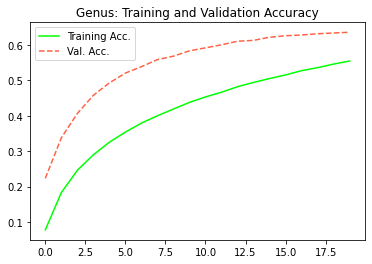

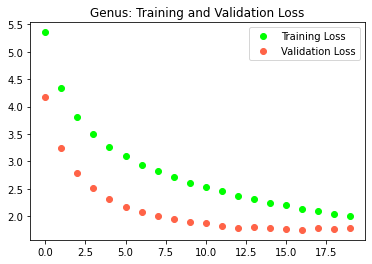

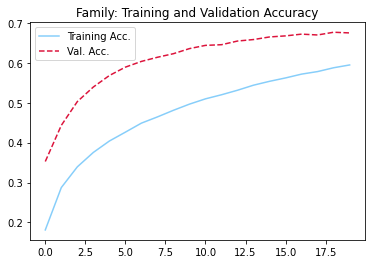

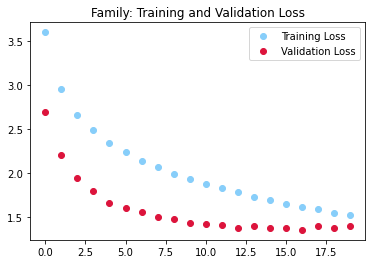

In [14]:
plot_training_history3(history)

In [13]:
resnet_50V2.save(DRIVE_DIR+DATA_DIR+'/resnet_50v2_MCM_feature_extractor.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
